In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
pd.set_option('display.max_columns', None)
data_train = pd.read_excel('Data_Train.xlsx')
data_test = pd.read_excel('Data_Test.xlsx')

In [5]:
price_train = data_train.Price  
# Concatenate training and test sets 
data = pd.concat([data_train.drop(['Price'], axis=1), data_test])

In [6]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [7]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13354 non-null  object
 6   Arrival_Time     13354 non-null  object
 7   Duration         13354 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13354 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


In [10]:
data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,13354,13354,13354,13354,13353,13354,13354,13354,13353,13354
unique,12,44,5,6,132,223,1451,374,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,4746,633,5682,5682,3000,288,536,672,7056,10493


In [11]:
data = data.drop_duplicates()

In [12]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
dtype: int64

In [13]:
data = data.drop(data.loc[data['Route'].isnull()].index)

In [14]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

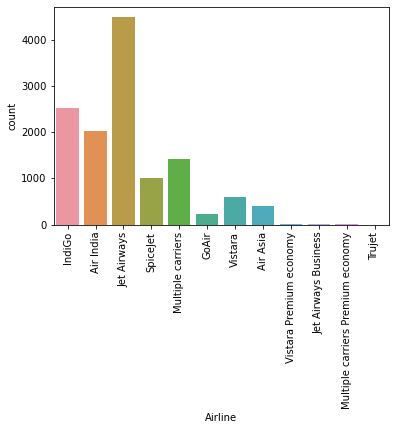

In [17]:
import seaborn as sns

sns.countplot(x='Airline', data=data)
plt.xticks(rotation=90)

In [18]:
data['Airline'] = np.where(data['Airline']=='Vistara Premium economy', 'Vistara', data['Airline'])
data['Airline'] = np.where(data['Airline']=='Jet Airways Business', 'Jet Airways', data['Airline'])
data['Airline'] = np.where(data['Airline']=='Multiple carriers Premium economy', 'Multiple carriers', data['Airline'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

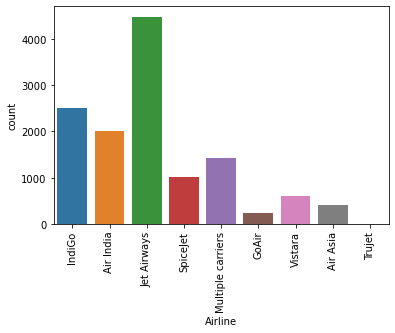

In [19]:
sns.countplot(x='Airline', data=data)
plt.xticks(rotation=90)

In [21]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [24]:
data['Destination'] = np.where(data['Destination']=='Delhi','New Delhi', data['Destination'])

In [25]:
data['Date_of_Journey'] 

0       24/03/2019
1        1/05/2019
2        9/06/2019
3       12/05/2019
4       01/03/2019
           ...    
2666     6/06/2019
2667    27/03/2019
2668     6/03/2019
2669     6/03/2019
2670    15/06/2019
Name: Date_of_Journey, Length: 12703, dtype: object

In [27]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Date_of_Journey'] 

0      2019-03-24
1      2019-01-05
2      2019-09-06
3      2019-12-05
4      2019-01-03
          ...    
2666   2019-06-06
2667   2019-03-27
2668   2019-06-03
2669   2019-06-03
2670   2019-06-15
Name: Date_of_Journey, Length: 12703, dtype: datetime64[ns]

In [29]:
data['day_of_week'] = data['Date_of_Journey'].dt.day_name()
data['day_of_week']

0          Sunday
1        Saturday
2          Friday
3        Thursday
4        Thursday
          ...    
2666     Thursday
2667    Wednesday
2668       Monday
2669       Monday
2670     Saturday
Name: day_of_week, Length: 12703, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

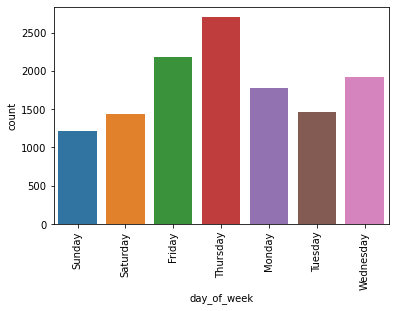

In [30]:
sns.countplot(x='day_of_week', data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

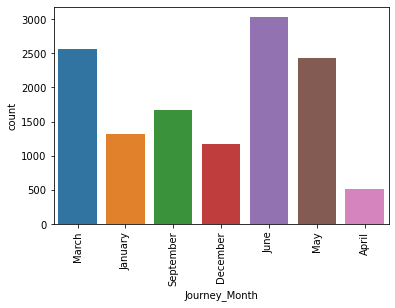

In [31]:
data['Journey_Month'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month_name()
sns.countplot(x='Journey_Month', data=data)
plt.xticks(rotation=90)

In [32]:
data['Departure_t'] = pd.to_datetime(data.Dep_Time, format='%H:%M')
a = data.assign(dept_session=pd.cut(data.Departure_t.dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
data['Departure_S'] = a['dept_session']

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

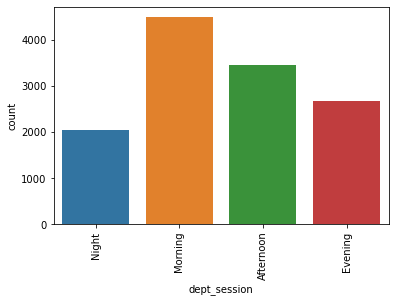

In [34]:
sns.countplot(x='dept_session', data=a)
plt.xticks(rotation=90)

In [35]:
data['Departure_S'].fillna("Night", inplace = True)

In [36]:
duration = list(data['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []  
 
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
     

data['Duration_hours'] = dur_hours
data['Duration_minutes'] =dur_minutes
data.loc[:,'Duration_hours'] *= 60
data['Duration_Total_mins']= data['Duration_hours']+data['Duration_minutes']

In [37]:
# Get names of indexes for which column Age has value 30
indexNames = data[data.Duration_Total_mins < 60].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [38]:
data.drop(labels = ['Arrival_Time','Dep_Time','Date_of_Journey','Duration','Departure_t','Duration_hours','Duration_minutes'], axis=1, inplace = True)

In [40]:
cat_vars = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'day_of_week', 'Journey_Month', 'Departure_S' ]
for var in cat_vars:
    catList = 'var'+'_'+var
    catList = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(catList)
    data = data1
    
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]

MemoryError: Unable to allocate 9.45 GiB for an array with shape (8, 158473912) and data type object